In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function to process each line and extract title and abstract
def process_line(line):
    parts = line.split('|')
    if len(parts) != 3:
        return None
    identifier, type, content = parts
    return type, content


In [3]:
# Reading the file and processing each line
file_path = 'NCBItestset_corpus.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

In [4]:
# Creating a dictionary to hold titles, abstracts, and abstract numbers
data = {'Title': [], 'Abstract': [], 'Abstract Number': []}
current_title = ''
abstract_number = 1  # Starting from 1

for line in lines:
    result = process_line(line)
    if result:
        type, content = result
        if type == 't':
            current_title = content
        elif type == 'a':
            data['Title'].append(current_title)
            data['Abstract'].append(content)
            data['Abstract Number'].append(abstract_number)
            abstract_number += 1  # Incrementing the abstract number for each new entry

In [5]:
# Creating a DataFrame
df1 = pd.DataFrame(data)

In [6]:
def process_file_for_tables_with_abstract_number(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Data structure to hold tabular data and abstract numbers
    table_data = []
    abstract_number = 0  # Start from abstract 1
    in_table = False  # Flag to indicate if we're in the tabular data section

    for line in lines:
        if '|t|' in line:
            in_table = False  # Reset flag when a new title is encountered
            abstract_number += 1  # Increment abstract number for each new title
        elif '|a|' in line:
            in_table = True  # Set flag when an abstract starts
        elif in_table and '|' not in line and line.strip():
            # Process tabular data line
            table_row = line.strip().split('\t')
            if len(table_row) > 1:  # Ensure the line is part of the table
                table_row.append(abstract_number)  # Add abstract number to the row
                table_data.append(table_row)

    # Creating a DataFrame from the extracted tabular data
    df_tables = pd.DataFrame(table_data, columns=[*range(len(table_data[0])-1), 'Abstract Number'])

    return df_tables

# Process the file and create a DataFrame of tables with abstract numbers
df_tables = process_file_for_tables_with_abstract_number(file_path)


In [7]:
# Correcting the column names as per the new specifications
df_tables.rename(columns={3: 'Entity_name', 4: 'Entity_class', 5: 'Mesh_info'}, inplace=True)


In [8]:
df = df_tables

In [9]:
df

,0,1,2,Entity_name,Entity_class,Mesh_info,Abstract Number
0,9949209,23,39,copper toxicosis,Modifier,OMIM:215600,1
1,9949209,158,185,hepatic copper accumulation,SpecificDisease,D008107,1
2,9949209,206,224,inherited disorder,DiseaseClass,D030342,1
3,9949209,272,299,hepatic copper accumulation,SpecificDisease,D008107,1
4,9949209,346,360,Wilson disease,SpecificDisease,D006527,1
...,...,...,...,...,...,...,...
940,9988281,996,1015,breast malignancies,SpecificDisease,D001943,100
941,9988281,1123,1147,invasive lobular cancers,DiseaseClass,D018275,100
942,9988281,1152,1179,low-grade ductal carcinomas,SpecificDisease,D044584,100
943,9988281,1269,1286,ductal carcinomas,SpecificDisease,D044584,100


In [10]:
df = df[['Entity_name', 'Entity_class', 'Abstract Number']]

In [11]:
# Dropping rows where 'Entity_name' is 3 characters or less
df = df[df['Entity_name'].apply(lambda x: len(x) > 3)]

In [13]:
# Dropping rows where 'Entity_class' is 'composite mention'
df = df[df['Entity_class'] != 'CompositeMention']

In [ ]:
df.to_excel('NER_answers.xlsx', index=False)

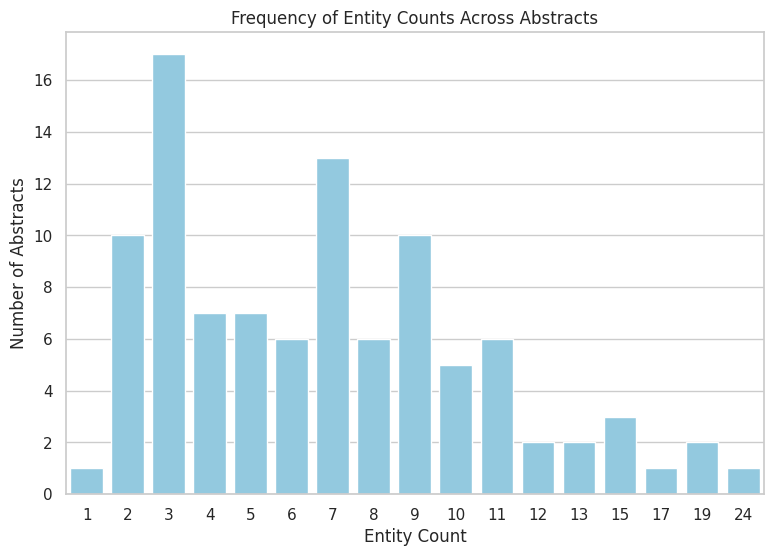

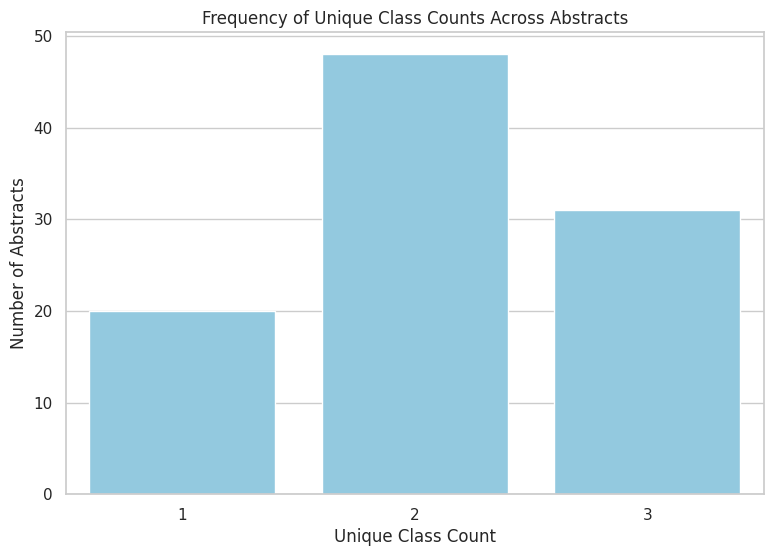

In [18]:
new_data = df
# Count of entities per abstract
entities_per_abstract = new_data.groupby('Abstract Number')['Entity_name'].count().reset_index()
entities_per_abstract.columns = ['Abstract Number', 'Entity Count']

# Count of unique classes per abstract
classes_per_abstract = new_data.groupby('Abstract Number')['Entity_class'].nunique().reset_index()
classes_per_abstract.columns = ['Abstract Number', 'Unique Class Count']

# Frequency of each entity count across abstracts
entity_count_frequency = entities_per_abstract['Entity Count'].value_counts().reset_index()
entity_count_frequency.columns = ['Entity Count', 'Number of Abstracts']

# Frequency of each unique class count across abstracts
class_count_frequency = classes_per_abstract['Unique Class Count'].value_counts().reset_index()
class_count_frequency.columns = ['Unique Class Count', 'Number of Abstracts']

# Setting the visual style for the plots
sns.set(style="whitegrid")

# Plotting frequency of entity counts in a separate figure
plt.figure(figsize=(9, 6))
sns.barplot(x='Entity Count', y='Number of Abstracts', data=entity_count_frequency, color='skyblue')
plt.title('Frequency of Entity Counts Across Abstracts')
plt.xlabel('Entity Count')
plt.ylabel('Number of Abstracts')
plt.show()

# Plotting frequency of unique class counts in a separate figure
plt.figure(figsize=(9, 6))
sns.barplot(x='Unique Class Count', y='Number of Abstracts', data=class_count_frequency, color='skyblue')
plt.title('Frequency of Unique Class Counts Across Abstracts')
plt.xlabel('Unique Class Count')
plt.ylabel('Number of Abstracts')
plt.show()